# Decomposizione a valori singolari (SVD)

**Esempio di compressione con perdita**

$Teorema$

Sia $A\in\mathbb{R}^{m\times n}$.

Esistono due matrici ortogonali $U\in\mathbb{R}^{m\times m}$ e $V\in\mathbb{R}^{n\times n}$ tali che

$$A = U\Sigma V^\top .$$

Con $\Sigma = diag(\sigma_1,\sigma_2,\ldots,\sigma_p),$  $\; p = \min\left\{m,n\right\}$ e $\sigma_1\geq \sigma_2\geq\ldots\sigma_p\geq 0$.
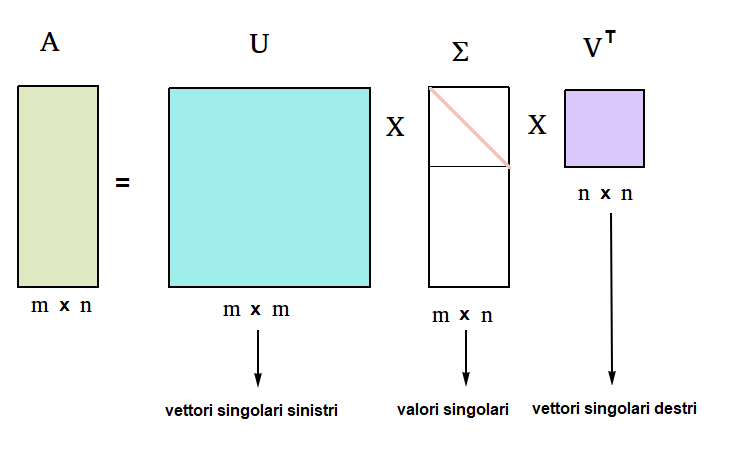

<div>
<img src="attachment:svd.png" width="600"/>
</div>

$Teorema$

Sia $A\in\mathbb{R}^{m\times n}$ e sia data la SVD di A: $A = U\Sigma V^\top$ con $\Sigma= diag(\sigma_1,\sigma_2,\ldots,\sigma_p)$, $p=\min\left\{m,n\right\}$ e tale che $\sigma_1\geq\sigma_2\geq\ldots\geq\sigma_{\color{verde}\bf r}>\sigma_{r+1} = \ldots = \sigma_p = 0$. Allora,

**1) Il rango di $A$ è $r$.**

2) Lo spazio $null(A) = span\left\{V_{r+1},\ldots,V_n  \right\}$.

3) L'immagine di $A$, $Im(A) = span\left\{U_1,U_2,\ldots,U_{r}  \right\} $.

**4) Si può risparmiare memoria per $A$ se $\displaystyle{r< \frac{(mn)}{(m+n+1)}}$:
\begin{align*}
A = \sum_{i=1}^r \sigma_iU_iV_i^\top.
\end{align*}**
5) $\| A\|_2 = \sigma_1$.

6) $\displaystyle{K(A) = \frac{\sigma_1}{\sigma_n}}$.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg

   ---------------------------------------- 0.0/313.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/313.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/313.5 kB ? eta -:--:--
   ----- --------------------------------- 41.0/313.5 kB 487.6 kB/s eta 0:00:01
   -------------- ----------------------- 122.9/313.5 kB 901.1 kB/s eta 0:00:01
   ---------------------------- ----------- 225.3/313.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 313.5/313.5 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


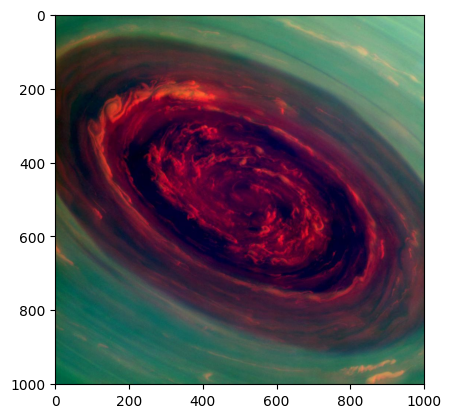

In [3]:
Imm = mpimg.imread('SatStorm.jpg')
plt.figure()
plt.imshow(Imm)

In [4]:
print('Dimensione immagine ', Imm.shape)  #non abbiamo matrice ma un tensore (3 dimensioni)

Dimensione immagine  (1001, 1001, 3)


In [5]:
#Y = 0.2125 R + 0.7154 G + 0.0721 B

Imm_gray = 0.2125*Imm[:,:,0] + 0.7154*Imm[:,:,1] + 0.0721*Imm[:,:,2]  #passiamo da tensore a matrice, con immagine a scala di grigi

print('Immagine grigia ', Imm_gray.shape)

Immagine grigia  (1001, 1001)


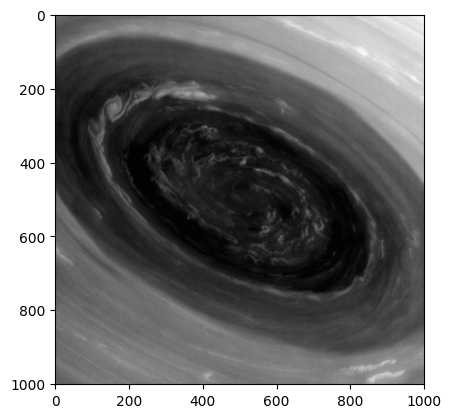

In [6]:
plt.figure()
plt.imshow(Imm_gray, cmap = plt.cm.gray)

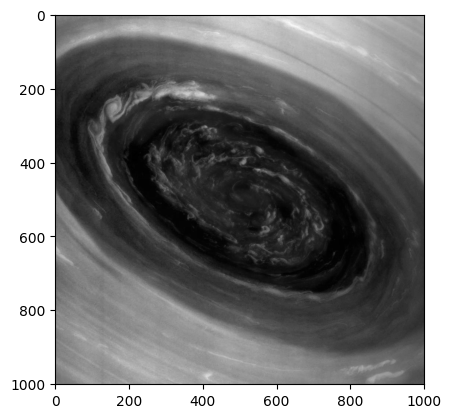

In [8]:
for i in range(1001):
    Imm_gray[:,i] = Imm_gray[:,i]/np.linalg.norm(Imm_gray[:,i])
#scalo i valori per avere una norma unitaria, NON è necessario ma è una buona pratica

In [9]:
U, s, V = np.linalg.svd(Imm_gray, full_matrices=True) #full_matrices=True significa che non faccio alcun troncamento

In [10]:
r = np.linalg.matrix_rank(Imm_gray)
print('Rango della matrice piena ', r) #rango massimo, la compatta equivale a quella piena

Rango della matrice piena  1001


<h1>CRITERIO SCREE-PLOT DI CATTEL</h1>

Text(0, 0.5, 'Singular values')

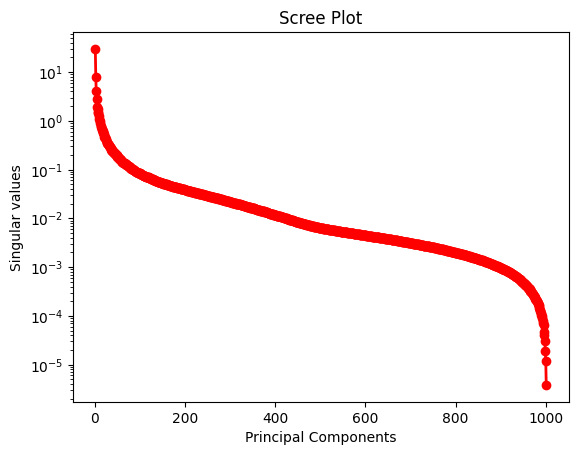

In [11]:
(num_obj, num_attr) = Imm_gray.shape
range_sing_vals = np.arange(num_attr) + 1
plt.semilogy(range_sing_vals, s, 'ro-', linewidth=2)  #scalo il logaritmo
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Singular values')

#plotto i valori singolari in scale semi-logaritmica

Approssimazione con 100 valori singolari  (1001, 1001)


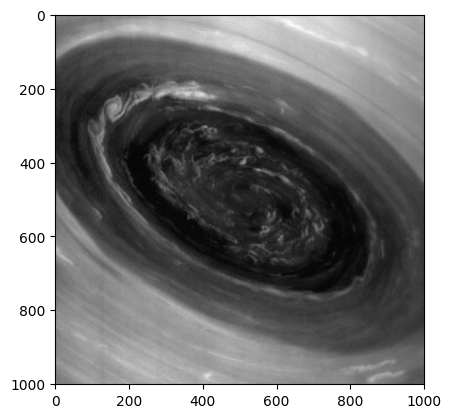

In [12]:
# Uso solo 100 valori singolari
S = s[0:100]*np.eye(100,100)
A_100 = np.dot(U[:,0:100], np.dot( S,  V[0:100,:]))

print('Approssimazione con 100 valori singolari ', A_100.shape)
plt.figure()
plt.imshow(A_100, cmap = plt.cm.gray)

# Criterio di Guttman-Keiser
Scegliere i primi $k$ valori singolari tali che : $\forall i >k, \sigma_i<1$.

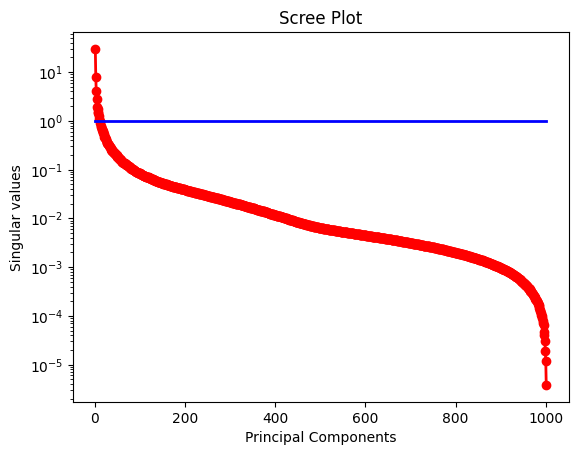

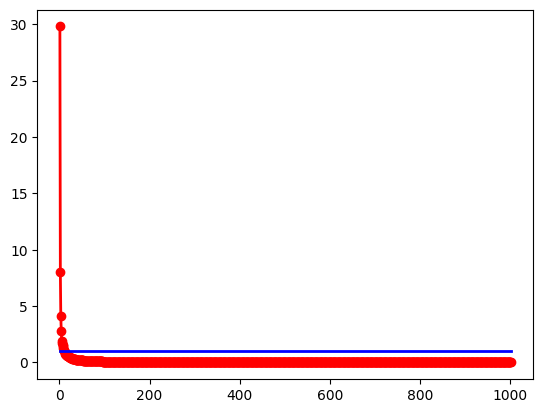

In [16]:
plt.semilogy(range_sing_vals, s, 'ro-', range_sing_vals, np.ones(1001), 'b-',linewidth=2,)  #scalo il logaritmo
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Singular values')
plt.figure()
plt.plot()

plt.plot(range_sing_vals, s, 'ro-', range_sing_vals, np.ones(1001), 'b-',linewidth=2,)

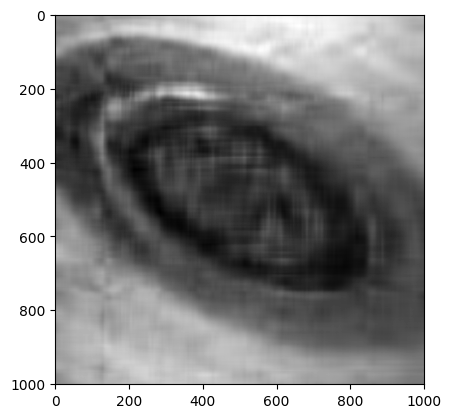

In [18]:
S = s[0:10]*np.eye(10,10)
A_10 = np.dot(U[:,0:10], np.dot( S,  V[0:10,:]))
#show the image
plt.figure()
plt.imshow(A_10, cmap = plt.cm.gray)

# Criterio dell'energia
Un altro criterio utile per decidere quanti valori singolari utilizzare è di conservare il $90\%$ dell'energia di $\Sigma$. Questo significa che la somma dei quadrati dei $\sigma_i$ scelti dovrebbe essere circa il $90\%$ della somma dei quadrati di tutti i $\sigma_i$.

In [19]:
energy_100 = np.sum(s[0:100]**2)
print('\n energy_100: ', energy_100)
energy_total = np.sum(s**2)
perc = energy_total*90/100
print('\n 90% dell energia totale: ', perc)
print('\n Ho trattenuto almeno il 90% di energia ?', energy_100>=perc)


 energy_100:  1000.5557915500386

 90% dell energia totale:  900.9000000000004

 Ho trattenuto almeno il 90% di energia ? True


In [20]:
#Decido automaticamente quanti valori prendere:
i = 0
temp = s[0]**2
print(temp)
n_it = 1
while (temp <perc) & (n_it <1000):
    i = i+1
    temp = np.sum(s[0:i+1]**2)
    n_it = n_it +1
print('Valori singolari necessari ', i+2)
print('s necessari \n ', s[0:i+2])

888.273114739623
Valori singolari necessari  3
s necessari 
  [29.80391106  8.06037028  4.12731042]


Approssimazione con 3 valori singolari  (1001, 1001)
Approssimazione con 11 valori singolari  (1001, 1001)


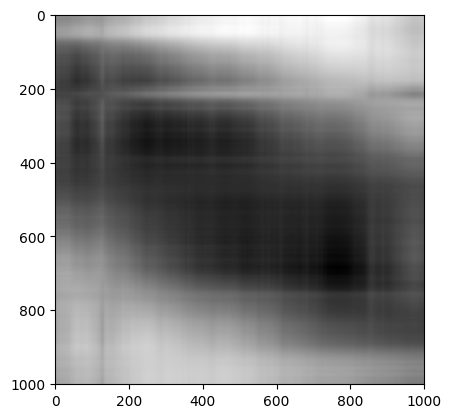

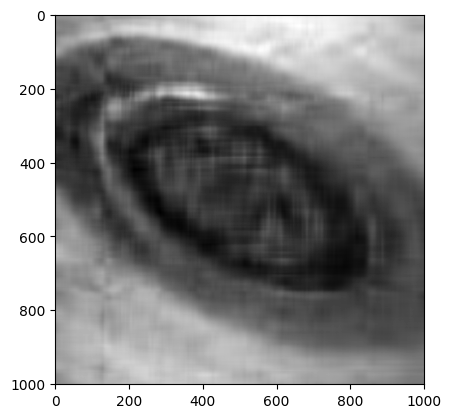

In [22]:
S_3 = s[0:3]*np.eye(3,3)
A_3 = np.dot(U[:,0:3], np.dot( S_3,  V[0:3,:]))

print('Approssimazione con 3 valori singolari ', A_3.shape)
plt.figure()
plt.imshow(A_3, cmap = plt.cm.gray)

S_11 = s[0:10]*np.eye(10,10)
A_11 = np.dot(U[:,0:10], np.dot( S_11,  V[0:10,:]))

print('Approssimazione con 11 valori singolari ', A_11.shape)
plt.figure()
plt.imshow(A_11, cmap = plt.cm.gray)

Entrambi i metodi si basano su delle tolleranze scelte arbitrariamente e non tengono conto della 'forma' dei dati.

# Criterio dell'entropia

Il contributo fornito da ogni valore singolare $\sigma_j$ può essere espresso come:
$$
f_j = \frac{\sigma_j^2}{\displaystyle{\sum_i \sigma_i^2}}.
$$

L'entropia è definita come:

$$
E = -\frac{1}{\log(r)}\sum_{i=1}^r f_i\log(f_i).
$$

Se l'entropia è vicino a $1$ significa che i primi valori singolari sono quelli che hanno un 'peso maggiore'. Se l'entropia è vicino  $0$ significa che tutti i valori singolari danno pressocchè lo stesso contributo.

Con questo criterio, vengono selezionati i primi $\sigma_k$ valori singolari, dove $k$ viene scelto come il più piccolo indice tale che:
$$
\sum_{i=1}^k f_i \geq E
$$

In [23]:
#Definisco il vettore dei contributi:
f = s**2/np.sum(s**2)
E = -1/np.log(r)*np.sum(f*np.log(f))
print('Entropia ', E)

F = np.cumsum(f)
K = F>E
b = np.argmax(K)
print(b)

perc_=0.70
ks = int(r*E*perc_)
print('Entropy =',E, 'suggested k=', ks)

Entropia  0.07983774093749799
0
Entropy = 0.07983774093749799 suggested k= 55


Approssimazione con 55 valori singolari  (1001, 1001)
Dimensione immagine  (1001, 1001)


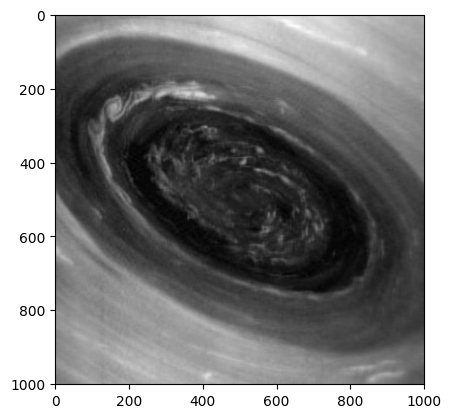

In [26]:
'''S_5 = s[0:b]*np.eye(b,b)
A_5 = np.dot(U[:,0:b], np.dot( S_5,  V[0:b,:]))

print('Approssimazione con 5 valori singolari ', A_5.shape)
plt.figure()
plt.imshow(A_5, cmap = plt.cm.gray)'''

S_55 = s[0:ks]*np.eye(ks,ks)
A_55 = np.dot(U[:,0:ks], np.dot( S_55,  V[0:ks,:]))

print('Approssimazione con 55 valori singolari ', A_55.shape)
plt.figure()
plt.imshow(A_55, cmap = plt.cm.gray)
#print size of the image

<h3>Varianza Totale</h3>

In [33]:
tot_var = np.sum(s**2)
print('\n total variance as by the singular values', tot_var)
print('\n 10% of total variance as by the singular values ', 0.1*tot_var )

print('\n percentaige of variance explained by the first eigenvalue ', 100*s[0]/tot_var )
print('\n percentaige of variance explained by the second eigenvalue ', 100*s[1]/tot_var )


val=100*s[0]/tot_var
k=0
while val <0.1*tot_var and k<1000:
    k=k+1
    val = val + 100*s[k]/tot_var



 total variance as by the singular values 1001.0000000000005

 10% of total variance as by the singular values  100.10000000000005

 percentaige of variance explained by the first eigenvalue  2.9774136927555612

 percentaige of variance explained by the second eigenvalue  0.8052317962722749


<h3> Varianza cumulativa </h3>

In [40]:
val=np.cumsum(s)/np.sum(s)
print(val)

perc=70*tot_var
i=0
temp=s[0]**2/tot_var
n_it=1
while (temp<perc) & (n_it<1000):
    i=i+1
    temp=np.sum(s[0:i+1]**2)/tot_var
    n_it=n_it+1
print('Number of singular values needed ', i+2)
print('s needed \n ', s[0:i+2])

[0.3394414  0.43124222 0.4782488  ... 0.99999982 0.99999996 1.        ]
Number of singular values needed  1001
s needed 
  [2.98039111e+01 8.06037028e+00 4.12731042e+00 ... 1.91906681e-05
 1.16742332e-05 3.84274895e-06]


<h1> Criteri basati sul calcolo di anomalie </h1>

<h3> PRIMO CRITERIO </h3>

In [45]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

clf = IsolationForest(random_state=0).fit_predict(s.reshape(-1,1)) #-1 outliers; 1 inliners
index_s = np.where(clf==-1)
index_s = index_s[0].astype(int)

Sigma_an1= s[index_s]*np.eye(len(index_s),len(index_s))
Rec_an1 = np.dot(U[:,index_s], np.dot(Sigma_an1,V[index_s,:]))
print(index_s) #nota, non abbiamo il gap
print('\n Relative error with anomaly detection, first method: ', np.linalg.norm(Imm_gray-Rec_an1)/s[0])

'''
clf = IsolationForest(random_state=0, contamination=0.05).fit_predict(s.reshape(-1,1)) #-1 outliers; 1 inliners
index_s = np.where(clf==-1)
index_s = index_s[0].astype(int)

Sigma_an1= s[index_s]*np.eye(len(index_s),len(index_s))
Rec_an1 = np.dot(U[:,index_s], np.dot(Sigma_an1,V[index_s,:]))
print(index_s) #nota, non abbiamo il gap
print('\n Relative error with anomaly detection, first method: ', np.linalg.norm(Imm_gray-Rec_an1)/s[0])'''

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]

 Relative error with anomaly detection, first method:  0.02154632281628018


"\nclf = IsolationForest(random_state=0, contamination=0.05).fit_predict(s.reshape(-1,1)) #-1 outliers; 1 inliners\nindex_s = np.where(clf==-1)\nindex_s = index_s[0].astype(int)\n\nSigma_an1= s[index_s]*np.eye(len(index_s),len(index_s))\nRec_an1 = np.dot(U[:,index_s], np.dot(Sigma_an1,V[index_s,:]))\nprint(index_s) #nota, non abbiamo il gap\nprint('\n Relative error with anomaly detection, first method: ', np.linalg.norm(Imm_gray-Rec_an1)/s[0])"

<h3> SECONDO CRITERIO </h3>

In [52]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.log(s.reshape(-1,1)))
lab = kmeans.labels_

Cl0 = np.where(lab==0)
Cl1 = np.where(lab==1)

l0 = len(Cl0[0])
l1 = len(Cl1[0])

if 0 in  Cl0[0]:
    clf2 = IsolationForest(random_state=0).fit_predict(np.log(s[Cl0[0]].reshape(-1,1))) #-1 outliers; 1 inliners
    #print("Cl0 ", Cl0)
else:
    clf2 = IsolationForest(random_state=0).fit_predict(np.log(s[Cl1[0]].reshape(-1,1))) #-1 outliers; 1 inliners
    #print("Cl1 ", Cl1)
indice = np.where(clf2==-1)
indice = indice[0].astype(int)
Last = np.where(np.diff(indice)>1)[0]
Last = Last[0]
print("\n number of singular values to retain ", Last)



Sigma_an2= s[0:Last]*np.eye(Last,Last)
Rec_an2 = np.dot(U[:,0:Last], np.dot(Sigma_an2,V[0:Last,:]))

print('\n Relative error with anomaly detection, second method: ', np.linalg.norm(Imm_gray-Rec_an2)/s[0])


 number of singular values to retain  59

 Relative error with anomaly detection, second method:  0.032808270975243


# Compressione mediante fattorizzazione QR con pivot

$Teorema$

Per ogni matrice $A\in \mathbb{C}^{m\times n}$ esistono una matrice unitaria $Q$ e una matrice 'trapezoidale' superiore $R$ tali che

$$
A = QR.
$$

Se $A$ è una matrice quadrata (cioè $m=n$), allora $R$ è una matrice triangolare superiore e $Q$ può essere una matrice ortogonale.

$Proposizione$

Sia $A$ una matrice di rango $r$. Allora, in aritmetica esatta, la fattorizzazione $QR$ con pivot è data da

$$
AP = Q \left(\begin{array}{cc}
R_{11} & R_{12}\\
0 & 0\\
\end{array}\right)\,, \quad R_{11} \mbox{ matrice } r\times r
$$

e gli elementi diagonali di $R_{11}$ sono non nulli (cioè $R$ è non singolare).

$\mathbf{N.B.}$ : Gli elementi diagonali di $R_{11}$ sono non decrescenti:
$$
|r_{11}|\geq |r_{22}|\geq \ldots
$$

In [53]:
from scipy import linalg

In [54]:
[Q,R,P]=linalg.qr(Imm_gray,pivoting=True) # Imm_gray P = QR

$\mathbf{N.B.}$ l'output $P$ è un array che contiene gli indici delle colonne permutate nella matrice originale ``Imm_gray``. Per cui per applicare la formula
$$
Imm\_gray\, P = QR
$$
dovremmo scrivere

``Imm_gray[:,P] = Q*R``

Calcoliamo un'approssimazione dell'immagine orignale memorizzata in ``Imm_gray`` utilizzando solo $k$ colonne di $Q$ e $k$ righe di $R$. Il numero $k$ viene scelto in base al livello di accuratezza che vogliamo raggiungere.
In particolare:

1) Estraiamo gli elementi diagonali di $R$ e in valore assoluto, scaliamoli rispetto al loro massimo in modulo,

2) memorizziamo in un array delle tolleranze $\varepsilon_1, \varepsilon_2, \varepsilon_3$,

3) scegliamo $k$ come il numero degli elementi diagonali di $R$ che sono minori delle varie tolleranze.

In [57]:
R_diag = np.diag(R) # Elementi diagonali di R memorizzati in un array

R_diag = abs(R_diag)/abs(np.max(R_diag)) # Elementi diagonali scalati rispetto al massimo assoluto

tol = np.array([1e-1, 1e-2, 1e-3]) # tolleranze10^(-1); 10^(-2); 10^(-3)

In [63]:
k = np.zeros([1,len(tol)])

for i in range(len(tol)):
    k[0,i] = int(np.count_nonzero(R_diag<tol[i]))
k = k.astype(int)
print(' array di k ', k)

 array di k  [[947 512  31]]


Approssimazione con 854 valori singolari  (1001, 1001)
Approssimazione con 854 valori singolari  (1001, 1001)
Approssimazione con 854 valori singolari  (1001, 1001)


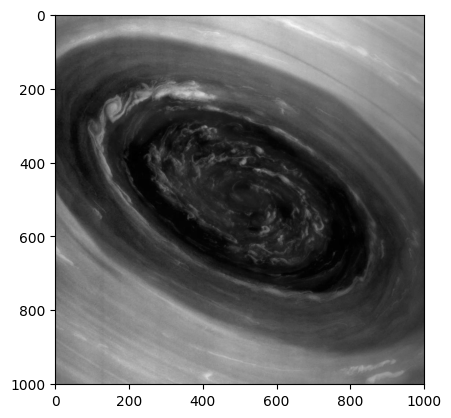

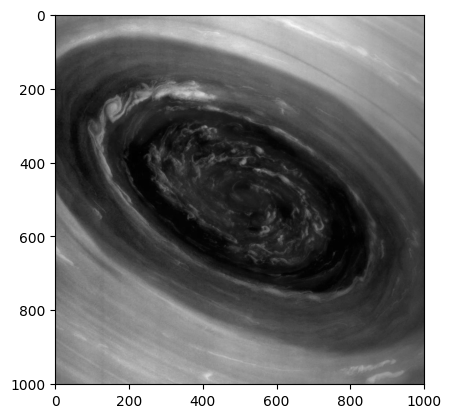

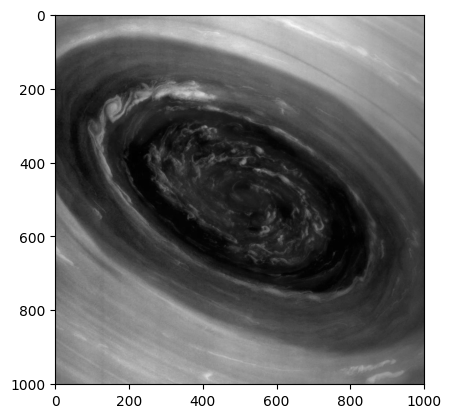

In [64]:
#k[0,0]

S_858 = s[0:k[0,0]]*np.eye(k[0,0],k[0,0])
A_858 = np.dot(U[:,0:k[0,0]], np.dot( S_858,  V[0:k[0,0],:]))

print('Approssimazione con 854 valori singolari ', A_858.shape)
plt.figure()
plt.imshow(A_858, cmap = plt.cm.gray)


#k[0,1]

S_858 = s[0:k[0,1]]*np.eye(k[0,1],k[0,1])
A_858 = np.dot(U[:,0:k[0,1]], np.dot( S_858,  V[0:k[0,1],:]))

print('Approssimazione con 854 valori singolari ', A_858.shape)
plt.figure()
plt.imshow(A_858, cmap = plt.cm.gray)


#k[0,2]

S_858 = s[0:k[0,2]]*np.eye(k[0,2],k[0,2])
A_858 = np.dot(U[:,0:k[0,2]], np.dot( S_858,  V[0:k[0,2],:]))

print('Approssimazione con 854 valori singolari ', A_858.shape)
plt.figure()
plt.imshow(A_858, cmap = plt.cm.gray)


# Un esempio più complesso: le immagini IPERSPETTRALI

L' $HyperSpectral \; Imaging$ ($\mathbf{HSI}$) è una tecnologia che combina le proprietà di una fotocamera digitale con le proprietà di uno spettrometro in grado di identificare gli attributi spettrali di ogni pixel in una data immagine. Quindi, un'immagine iperspettrale colleziona la $firma \;spettrale$ di ogni pixel ad una lunghezza d'onda specifica, determinata a priori.
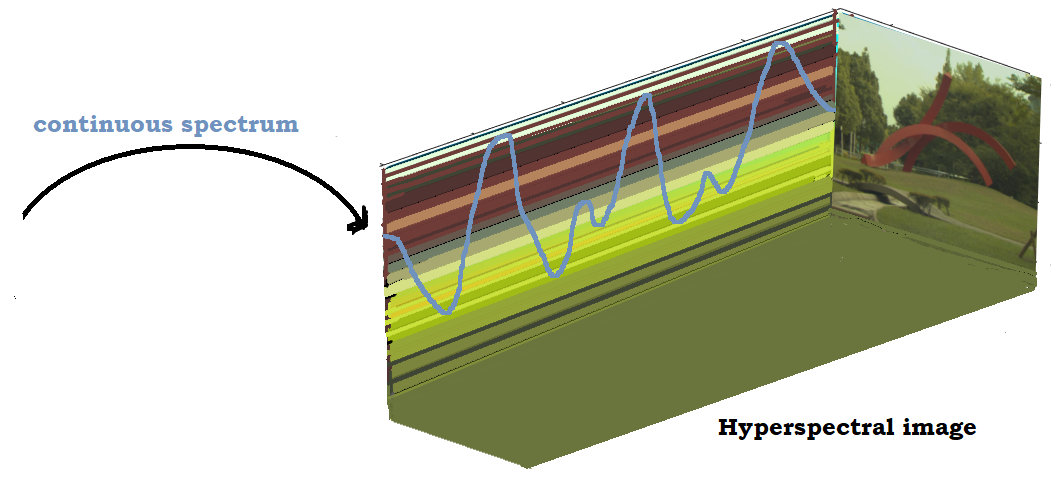
Per ogni pixel, vengono memorizzate centinaia di bande equispaziate, per cui si può pensare allo spettro come ad una funzione continua per ogni pixel
L'immagine iperspettrale si può quindi pensare come un cuboide:
nelle direzioni di ''lunghezza'' e ''altezza'' viene memorizzata l'informazione spaziale. Nella direzione della ''profondità'' troviamo invece la $firma\; spettrale$.

<div>
<img src="attachment:Prova.png" width="500"/>
</div>

Per questo tipo di immagini è molto comune operare una compressione della dimensione spettrale. Per applicare le tecniche appena viste dobbiamo prima riarrangiare l'immagine in oggetto sotto forma di matrice:
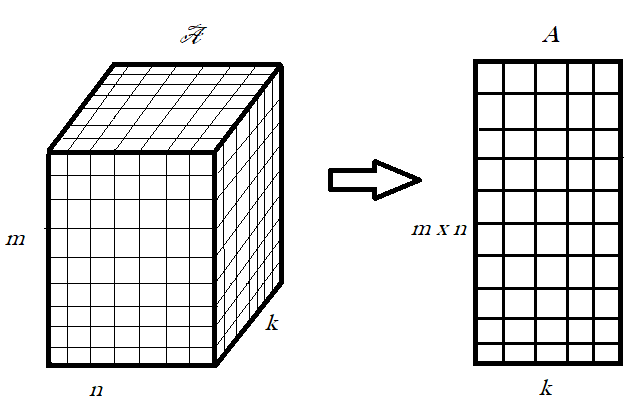
<div>
<img src="attachment:TensorMatrix.png" width="400"/>
</div>

In [ ]:
! pip install mat73

In [ ]:
from os.path import dirname, join as pjoin
from scipy.io import loadmat
import mat73

In [ ]:
!wget http://data.airc.aist.go.jp/HS-SOD/HS-SOD.zip
!unzip HS-SOD.zip

--2021-07-11 13:35:44--  http://data.airc.aist.go.jp/HS-SOD/HS-SOD.zip
Resolving data.airc.aist.go.jp (data.airc.aist.go.jp)... 13.35.101.64, 13.35.101.32, 13.35.101.80, ...
Connecting to data.airc.aist.go.jp (data.airc.aist.go.jp)|13.35.101.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data-dapc-riuo-aist.s3.abci.ai/HS-SOD/HS-SOD.zip [following]
--2021-07-11 13:35:45--  https://data-dapc-riuo-aist.s3.abci.ai/HS-SOD/HS-SOD.zip
Resolving data-dapc-riuo-aist.s3.abci.ai (data-dapc-riuo-aist.s3.abci.ai)... 163.220.128.200
Connecting to data-dapc-riuo-aist.s3.abci.ai (data-dapc-riuo-aist.s3.abci.ai)|163.220.128.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5549583419 (5.2G) [application/zip]
Saving to: ‘HS-SOD.zip’

HS-SOD.zip          100%[===================>]   5.17G  27.5MB/s    in 3m 27s  

2021-07-11 13:39:13 (25.5 MB/s) - ‘HS-SOD.zip’ saved [5549583419/5549583419]

Archive:  HS-SOD.zip
   creating:

In [ ]:
filepath ='Figure'
iper_mat = pjoin(filepath,'0034.mat')
#filepath = 'HS-SOD/hyperspectral'
#iper_mat = pjoin(filepath,'0034.mat')

In [ ]:
iper_img = mat73.loadmat(iper_mat) # Dizionario
#iper_img = loadmat(iper_mat)

In [ ]:
iper_img = iper_img['hypercube']

In [ ]:
iper_img = iper_img.astype(float)

In [ ]:
# Facciamo un reshape del tensore:
[m,n,k] = iper_img.shape
print('Dimensioni dell immagine iperspettrale ', m,n,k)

Mat = np.reshape(iper_img,[m*n,k])
print('Nuova dimensione ', Mat.shape)

In [ ]:
# Applichiamo la SVD
U_M, s_M, V_M = np.linalg.svd(Mat, full_matrices=False)

In [ ]:
r_M = np.linalg.matrix_rank(Mat)
print('Rango della matrice piena ', r_M)

In [ ]:
(num_obj, num_attr) = Mat.shape
range_sing_vals = np.arange(num_attr) + 1
plt.semilogy(range_sing_vals, s_M, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Singular values')

In [ ]:
# Controlliamo per esempio il criterio dell'energia:
energy_total = np.sum(s_M**2)
perc = energy_total*90/100
print('percentuale 90% ', perc)

In [ ]:
#Decido automaticamente quanti valori prendere:
i = 0
temp = s_M[0]**2
print(temp)
n_it = 1
while (temp <perc) & (n_it <1000):
    i = i+1
    temp = np.sum(s_M[0:i+1]**2)
    n_it = n_it +1
print('Valori singolari necessari ', i+2)
print('s necessari \n ', s_M[0:i+2])

In [ ]:
#Controlliamo anche il criterio dell entropia
#Definisco il vettore dei contributi:
f = s_M**2/np.sum(s_M**2)
E = -1/np.log(r_M)*np.sum(f*np.log(f))
print('Entropia ', E)

perc_=0.70
ks = int(r_M*E*perc_)
print('Entropy =',E, 'suggested k=', ks)

In [ ]:
# Selezioniamo quindi le prime due colonne di U_M, le prime 2 righe di V_M e i primi due valori singolari
S_2 = s_M[0:2]*np.eye(2,2)
iper_mat_approx = np.dot(U_M[:,0:2], np.dot(S_2, V_M[0:2,:]))
iper_mat_approx.shape

Adesso ci poniamo la domanda di $quantificare$ l'accuratezza della nostra approssimazione. Infatti, mentre per il caso precedente potevamo visualizzare l'immagine compressa, nel caso iperspettrale non possiamo avvalerci di strumenti standard per la visualizzazione. Occorre perciò riuscire a $misurare$ in grado di precisione raggiunto attraverso la nostra approssimazione. In altri termini, dobbiamo provare a capire il grado di $similarità$ (o di $dissimilarità$) tra i due oggetti presi in esame.

### Misure di similarità

In generale, nella Data Science, misurare la $similarità$ significa misurare quanto i campioni dei dati forniti siano in relazione o vicini gli uni con gli altri. Daltro canto, misurare la $dissimilarità$ dei dati, ci fornisce invece una misura di quanto i dati in oggetto siano distinti gli uni dagli altri.

Possiamo utilizzare delle vere e proprie metriche dal punto di vista matematico oppure altri tipi di funzioni.

 # Metrica:
 Una funzione $d$ si dice una metrica se:
 - $\forall $ coppia di osservazioni $x$ e $y$, risulta $d(x,y)\ge 0$. In particolare $d(x,y) = 0$ se e soltanto se $x=y$. Cioè, una distanza è sempre positiva o nulla. E' nulla se e soltanto se le due osservazioni coincidono.
 - $\forall$ coppia di osservazioni $x$ e $y$ risulta $d(x,y) = d(y,x)$. Cioè, una distanza è sempre simmetrica.
 - $\forall x,y,z$ risulta $d(x,y) \leq d(x,z) + d(z,y)$. Questa ultima proprietà si chiama 'disuguaglianza triangolare'.

 Qualunque funzione di distanza che non soddisfi queste proprietà non può essere considerata una metrica.

# 1) Norma Euclidea
Un esempio classico di distanza che appunto è una metrica, è dato dalla $\mathbf{norma\; 2}$ (o norma Euclidea) tra vettori.

Nella matrice ``iper_mat_approx``, per ogni pixel abbiamo costruito un'approssimazione della sua firma spettrale usando il contributo di $2$ valori singolari. Quindi, per capire quanto ci siamo discostati dal dato originale, dobbiamo calcolare la norma 2 del vettore differenza ottenuto per ogni pixel $i$ come ``Mat[i,:] - iper_mat_approx[i,:]`` .

In [ ]:
diff_vect = Mat- iper_mat_approx
Euclidea = np.zeros([1,m*n])
for i in range(m*n):
    Euclidea[0,i] = np.linalg.norm(diff_vect[i,:])

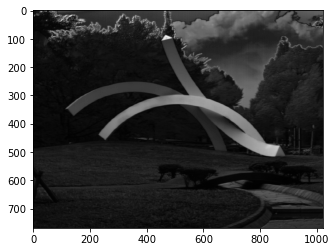

In [ ]:
#Facciamo un plot dell'immagine contenente la norma Euclidea

Mat_Euclidea = np.reshape(Euclidea,[m,n])

plt.imshow(Mat_Euclidea,cmap=plt.cm.gray)

# 2) Distanza del coseno o Spectral Angle Mapper (SAM)

Date due osservazioni $x$ e $y \in \mathbb{R}^n$ potrebbe essere utile misurare la grandezza dell'angolo $\theta$ tra $x$ e $y$.

Questo tipo di distanza è utile quando i punti osservati vengono pensati come 'direzioni', per cui, non c'è distinzione tra i singoli vettori e i loro multipli.

$$
\cos\theta = \frac{x^\top y}{\|x\|_2\,\|y\|_2}
$$

Da cui,
$$
\theta = \arccos\left( \frac{x^\top y}{\|x\|_2\,\|y\|_2}\right)
$$

Il prodotto scalare tra due vettori $x,y \in \mathbb{R}^n$ è definito come la somma del prodotto delle componenti. Quindi, il prodotto al numeratore, $x^\top y$ si calcola come:

$$
x^\top y = \sum_{i=1}^n x_iy_i
$$

Applichiamo quindi la coseno similarità tra ogni riga della matrice ``Mat`` e ``iper_mat_approx``:

In [ ]:
cos_sim = np.zeros([1,m*n])

for i in range(m*n):
    norm2_Mat = np.linalg.norm(Mat[i,:])
    norm2_approx = np.linalg.norm(iper_mat_approx[i,:])
    cos_sim[0,i] = np.arccos( np.dot(Mat[i,:],iper_mat_approx[i,:])/(norm2_Mat * norm2_approx) )

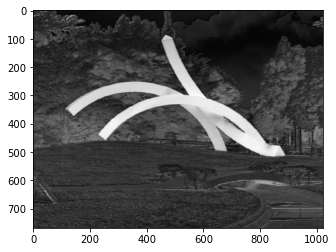

In [ ]:
#Facciamo un plot per vedere la coseno similarità:
Mat_cos = np.reshape(cos_sim,[m,n])
plt.imshow(Mat_cos, cmap = plt.cm.gray)

# 3) Spatial Mean SAM (SMSAM)
Consideriamo l'angolo $\theta$ tra i vettori spettrali $x$ e $y$ della matrice ``Mat`` e ``iper_mat_approx`` pescati in una finestra quadrata $V$ di lato $2$, e ne calcoliamo la media:



\begin{align*}
SMSAM(\ell):=\frac{1}{|V(\ell)|}\sum_{\ell_{i,j}\in V(\ell)}\arccos\left( \frac{x_\ell^\top y_\ell}{\| x_\ell\|_2 \| y_\ell\|_2} \right).
\end{align*}

# 4) Coefficiente di correlazione di PEARSON

Questo tipo di ''distanza'' quantifica la forza di una possibile relazione lineare, monotona, tra due attributi. Assume dei valori compresi tra $-1$ e $1$, dove $0$ indica nessuna correlazione. Inoltre, si assume che i dati considerati seguano una distribuzione normale. Si calcola come:

$$
c_p = \displaystyle{\frac{\sum (x-\mu_x)\sum (y-\mu_y)}{\sqrt{\sum(x-\mu_x)^2\sum(y-\mu_y)^2 }}},
$$

dove $\mu_x$ e $\mu_y$ denotano la media rispettivamente del vettore $x$ e del vettore $y$.

In [ ]:
from scipy import stats

In [ ]:
c_p = np.zeros([1,m*n])
for i in range(m*n):
    c_p[0,i],p = stats.pearsonr(Mat[i,:], iper_mat_approx[i,:])

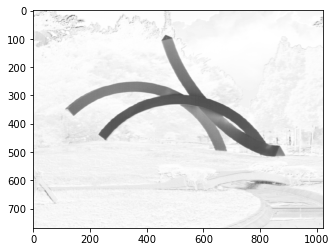

In [ ]:
Mat_p = np.reshape(c_p,[m,n])
plt.imshow(Mat_p, cmap = plt.cm.gray)

# 5) Z-score modificato (ZID)

E' un metodo per ''standardizzare'' un insieme di valori. Data un'osservazione $x$ la Z-score si calcola come:

$$
Z = \frac{x-\mu}{\delta},
$$

dove $\mu$ indica la media e $\delta$ la deviazione standard.

Quindi, la Z-score ci dice quante ''deviazioni standard'' è lontana l'osservazione $x$ dalla media. Una Z-score $= 0$, significa che $x$ si trova sulla media $\mu$. Se la Z-score è positiva, significa che l'osservazione il valore $x$ è più alto della media, altrimenti, se la Z-score è negativa, l'osservazione $x$ ha un valore più basso della media.  

$\mathbf{N.B.}$ La Z-score non cambia la forma della distribuzione dei dati:
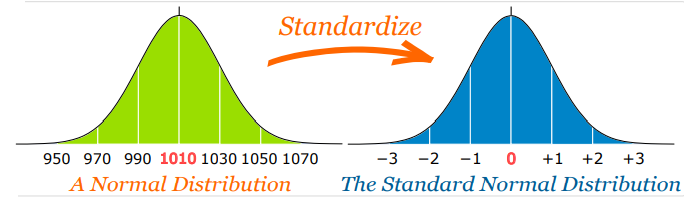
<div>
<img src="attachment:ZID.png" width="500"/>
</div>

La Z-score modificata (ZID) non fa altro che prendere il quadrato della Z-score classica. Se $x$ è un vettore spettrale, la sua ZID si calcola come:

$$
ZID = scale\left( \sum_{k}\left( \frac{x-\mu}{\delta} \right)^2 \right).
$$

Nella formula appena scritta l'operazione $scale$ indica che i valori ottenuti devono poi essere mappati tra $0$ e $1$.

In [ ]:
#Applichiamo il calcolo della ZID alla matrice delle differenze
ZID = np.zeros([1,m*n])
for i in range(m*n):
    ZID[0,i]=np.sum(((diff_vect[i,:] - np.mean(diff_vect[i,:]))/np.std(diff_vect[i,:]))**2)

80.99999999999994 81.00000000000006


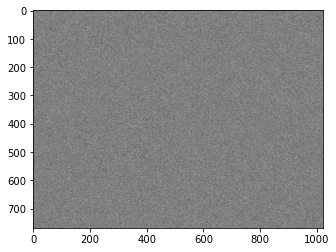

In [ ]:
m_ZID = np.min(ZID)
M_ZID = np.max(ZID)
ZID = - (ZID-M_ZID)/(m_ZID-M_ZID) + 1

Mat_zid = np.reshape(ZID,[m,n])
plt.imshow(Mat_zid, cmap = plt.cm.gray)

# 6) SAM-ZID

E' una misura di distanza che combina la ZID con la SAM in modo tale da ridurre gli effetti dovuti all'illuminazione.

$$
SAMZID = scale[\sin(SAM)]\times ZID.
$$

L'operatore $\times$ denota la moltiplicazione elemento per elemento.

In [ ]:
m_SAM = np.min(cos_sim)
M_SAM = np.max(cos_sim)
SAM = - (cos_sim-M_SAM)/(m_SAM-M_SAM) + 1

SAMZID = np.sin(SAM)*ZID

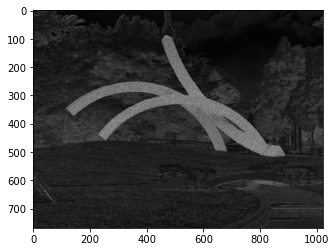

In [ ]:
Mat_samzid = np.reshape(SAMZID,[m,n])
plt.imshow(Mat_samzid,cmap=plt.cm.gray)

# ESERCIZIO

Selezionare una delle distanze presenti in tabella e provare a fare la propria implementazione. Ricordare che con $x$ denotiamo per esempio un generico vettore riga della matrice ``Mat`` e con $y$ un vettore generico della matrice ``iper_mat_approx``. Inoltre, la differenza tra $x$ e $y$ è già stata memorizzata nella matrice ``diff_vect``.

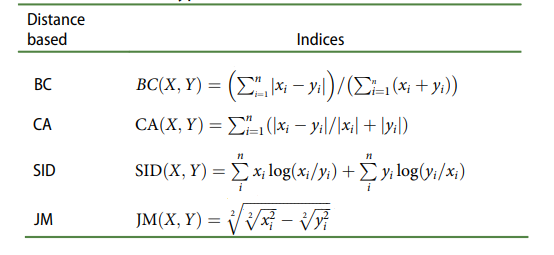